# 🧠 The Information Overload Challenge in Healthcare

Modern healthcare professionals are faced with an enormous amount of patient data — from electronic health records (EHRs) and clinical notes to lab results and imaging reports. Processing all this data efficiently is often not feasible in time-critical scenarios.

### 🔎 Illustrative Example

Let’s consider a doctor reviewing a patient's EHR before making a treatment decision. The EHR might include:

- 🧾 3–5 pages of discharge summaries  
- 💬 Progress notes from multiple specialists  
- 🧪 Lab results over several weeks  
- 📋 Medication history  
- 🖼️ Radiology reports  

Now, imagine this real-world snippet from a progress note:

> *The patient has been having arm pain for several months. She underwent an exercise stress echocardiogram within the last several months with me, which was equivocal, but then she had a nuclear stress test which showed inferobasilar ischemia. I had originally advised her for a heart catheterization but she wanted medical therapy, so we put her on a beta-blocker. However, her arm pain symptoms accelerated and she had some jaw pain, so she presented to the emergency room. On 08/16/08, she ended up having a cardiac catheterization and that showed normal left main 80% mid LAD lesion, circumflex normal, and RCA totally occluded in the mid portion and there were collaterals from the left to the right, as well as right to right to that area. The decision was made to transfer her as she may be having collateral insufficiency from the LAD stenosis to the RCA vessel. She underwent that with drug-eluting stents on 08/16/08, with I believe three or four total placed, and was discharged on 08/17/08. She had some left arm discomfort on 08/18/08, but this was mild. Yesterday, she felt very fatigued, but no arm pain, and today, she had arm pain after walking and again it resolved now completely after three sublingual nitroglycerin. This is her usual angina. She is being admitted with unstable angina post stent.*

Even this short note contains **critical information** hidden within lots of data which may not be as important. Multiply that by dozens of such notes per patient per visit, and you get a sense of the cognitive burden.

➡️ **This is where summarization tools can play a critical role — by distilling the most important clinical information quickly and accurately.**

Consider this summary:

> *The patient, experiencing arm pain for several months, initially declined heart catheterization and was treated with a beta-blocker following equivocal and ischemia-indicating stress tests. Her symptoms worsened with jaw pain, prompting an ER visit. On 08/16/08, cardiac catheterization revealed significant LAD stenosis and complete RCA occlusion with collateral circulation. She received multiple drug-eluting stents and was discharged on 08/17/08. Subsequent mild symptoms included arm discomfort and fatigue. She is now being admitted with unstable angina post-stenting.*

# 🧭 Types of Summarization:

When it comes to automatic text summarization, there are two primary approaches:

- Extractive Summarization
- Abstractive Summarization

### 🔍 Key Differences

| Feature                  | Extractive                         | Abstractive                        |
|--------------------------|-------------------------------------|------------------------------------|
| Output Style             | Copies original text                | Generates new text                 |
| Coherence                | Sometimes fragmented                | Generally more fluent              |
| Factual Reliability      | High (uses original sentences)      | Moderate (may hallucinate facts)   |
| Interpretability         | Easy to trace back                  | Harder to trace                    |
| Computational Demand     | Lower                               | Higher                             |
| Domain Adaptability      | Moderate                            | High (with fine-tuning)            |

---

➡️ In healthcare settings, **extractive methods** are useful for quick highlighting, while **abstractive summarization** can offer deeper understanding and better readability — especially for clinical notes, discharge summaries, and radiology reports.


<h1 style="color:red;">Before you start</h1>

## Attach a dataset
You need to attach a dataset to this notebook which we will use in this workshop. It's pretty simple. Just follow the following steps:

<p style="color:red">Not required if you can see mtsamples under Input section in the right sidebar.</p>

1. Open the right sidebar if not already open (look for a button with arrow key on bottom right)
2. Next, click "+ Add Input"
3. Select "Datasets" from the button just below the search bar.
4. In the search bar type "mtsamples"
5. Select "mtsamples - Atharva Kaushik" (you may have to press the small "+" button on the right)
6. Close the "Add Input" section by pressing "X" on top-right.


## Enable the accelerator
Platform like Kaggle and Google Colab are useful because they allow us to use GPU (accelerator) for computation which makes running most of the load-intensive models faster. But before we can do that, we need to enable the accelerator. To do so, follow these steps:

1. Press the "Settings" button on the top bar (just below the notebook title)
2. Hover over "Accelerator"
3. Select either "GPU T4 x2" or "GPU P100"
4. Done.

## Enable Internet
Notebooks are also a good choice for prototyping/workshops because a lot of stuff needs to be downloaded on the go. Kaggle/Google provides excellent downloading speeds. On Kaggle, internet is not active by default. Here are the steps to the "Enable Internet" in this notebook:

<p style="color:red">Not required if you can see Internet on under Session Option in the right sidebar.</p>

1. Open the left sidebar and press Home in a new tab.
2. Click on your profile icon (top-right), go to settings and you'll find the option "Phone verification". Press the button and follow the steps to verify your phone.
3. On the same settings and find the option "Verify Identity".  Press the button and follow the steps to verify your identity.
4. In the window (where you are reading the instructions), open the right sidebar if not already open (look for a button with arrow key on bottom right)
5. Click on it then click "Session Options", scroll and voila! there it is! "Enable Internet" button.
   
P.S : First two steps are necessary or else you won't see "Enable Internet" option under Session Options.

# First Steps: Loading a dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/mtsamples.csv',index_col=0)

# Uncomment the line (put cursor on the line and press Ctrl + /) below if above line fails
# df = pd.read_csv('/kaggle/input/mtsamples/mtsamples.csv',index_col=0)

df.drop_duplicates(subset=['description'],inplace=True)
df.head()

In [ ]:
print(df.shape)

# 📌 Extractive Summarization

**Definition:**  
Extractive summarization involves selecting and concatenating the most important sentences or phrases directly from the original text — without altering the wording.

**Strengths:**
- Fast and computationally efficient.
- Maintains factual correctness (since it uses original sentences).
- Useful when interpretability and traceability are important.

**Weaknesses:**
- May result in redundancy or lack of coherence.
- Often lacks the ability to paraphrase or synthesize ideas.
- Does not reduce verbosity as effectively as abstractive methods.

---

## Method 1: Extractive summary using TF-IDF

### 🧠 Intuition Behind Extractive Summarization using TF-IDF

Extractive summarization with **TF-IDF (Term Frequency-Inverse Document Frequency)** is based on a simple idea:

> 🗣️ **"Sentences that contain rare but important words (i.e., informative terms) are likely to be good summary candidates."**

### ✍️ How It Works

1. **Split the text into sentences**.
2. **Convert each sentence and the entire document into TF-IDF vectors**:
   - Words that appear frequently in a sentence but not frequently across all sentences get **higher scores**.
3. **Compute cosine similarity** between each sentence vector and the full document vector:
   - This tells us how *representative* a sentence is of the entire document.
4. **Pick the top N most similar sentences** as the summary.

---

### 🖼️ Visualization

Below is a graphic that captures the core idea of TF-IDF-based extractive summarization:

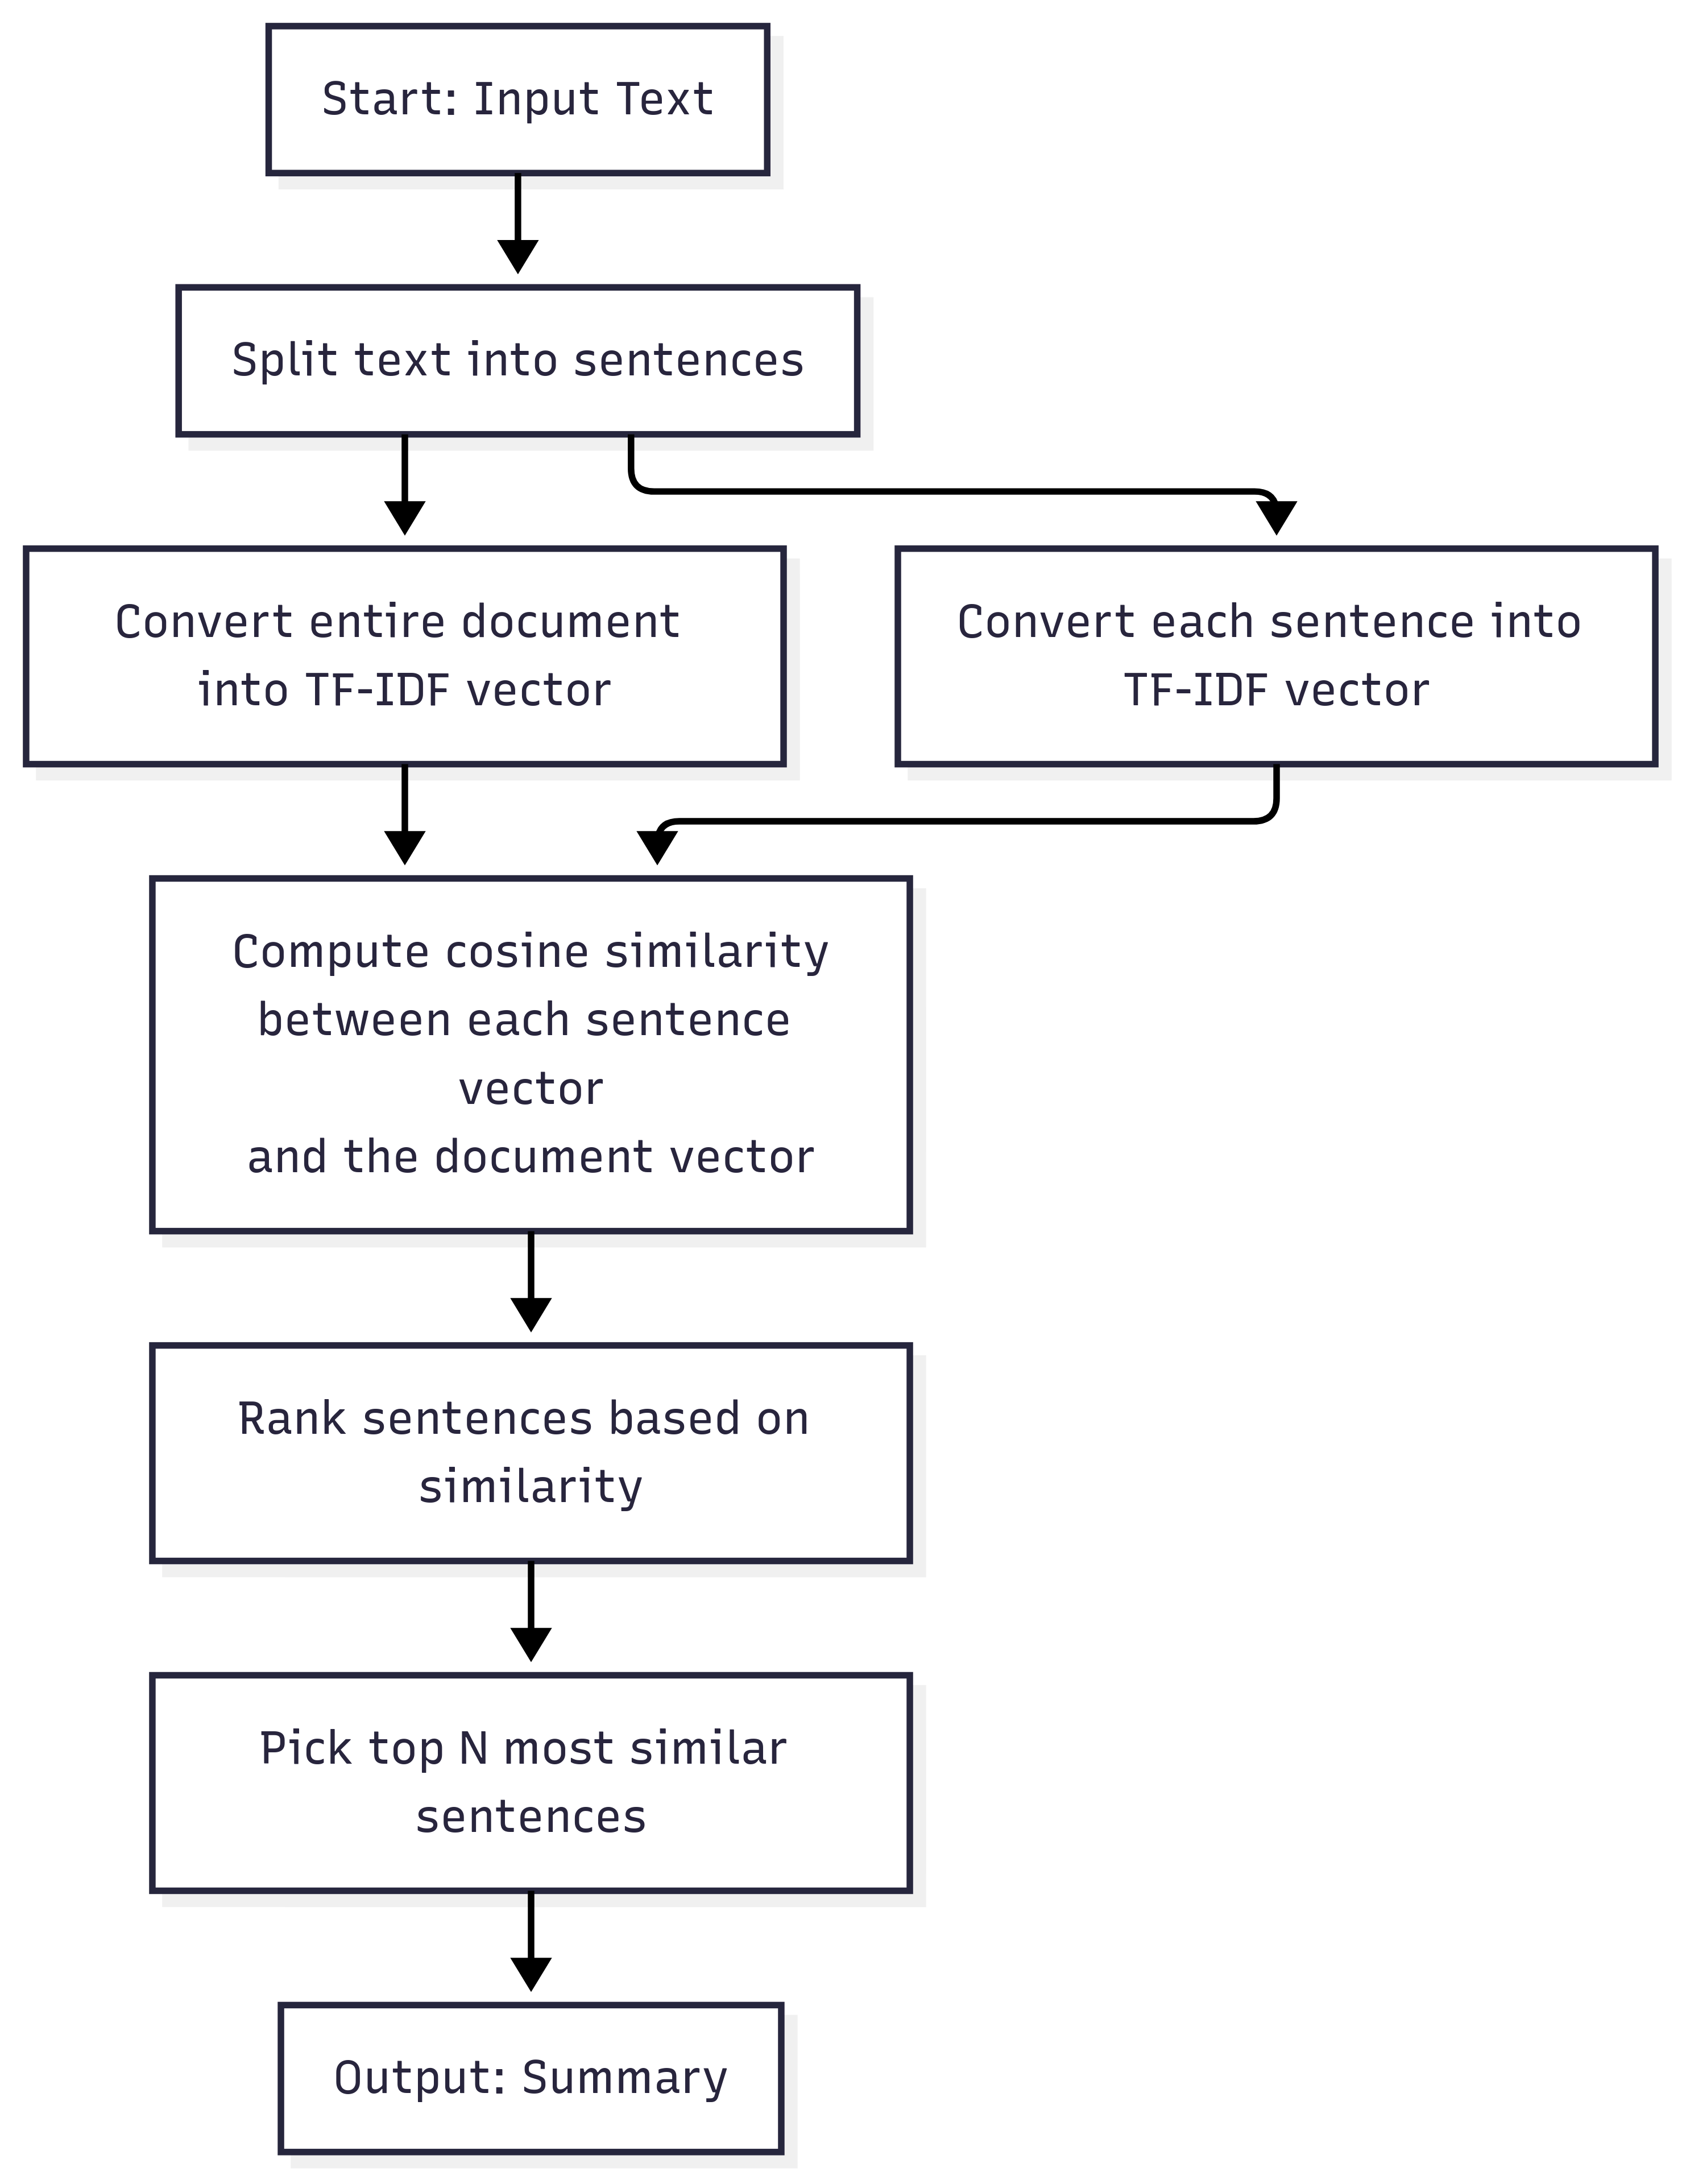

*Illustration: Sentences are ranked by their similarity to the full document. The most representative ones are selected.*

---

In clinical narratives or medical records:
- Keywords like _"ischemia"_, _"occlusion"_, or _"stent"_ carry critical meaning.
- TF-IDF helps us **surface these high-information sentences** without needing deep learning models.
- It’s **fast**, **transparent**, and **interpretable**.

In [ ]:
idx = 0
text = df.iloc[idx]['transcription']
print(text)

In [ ]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import heapq

# Download required resources
# nltk.download('punkt')

# Step 1: Sentence Tokenization
sentences = nltk.sent_tokenize(text)

# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# Step 3: Compute cosine similarity of each sentence with the whole text
document_vector = vectorizer.transform([text])
similarity_scores = cosine_similarity(tfidf_matrix, document_vector).flatten()

# Step 4: Select top-N most similar sentences
top_n = 3
top_indices = heapq.nlargest(top_n, range(len(similarity_scores)), similarity_scores.__getitem__)
summary = [sentences[i] for i in sorted(top_indices)]  # sort to maintain original order

# Display extractive summary
print("📌 Extractive Summary:\n")
for sent in summary:
    print("- " + sent.strip())

## Method 2: Extractive Summarization using TextRank

### 🧠 Intuition Behind Extractive Summarization using TextRank

TextRank is a **graph-based ranking algorithm**, inspired by Google's PageRank. Instead of ranking web pages, it ranks **sentences** based on how well they are connected (semantically similar) to each other.

> 🗣️ **"Important sentences are those that are most similar to other important sentences."**

---

### 🧪 How It Works

1. **Split the text into sentences.**
2. **Compute pairwise similarity** between all sentences using cosine similarity (based on word embeddings, TF-IDF, or other metrics).
3. **Construct a graph** where:
   - **Nodes = sentences**
   - **Edges = similarity scores** between sentences
4. **Apply the TextRank algorithm**:
   - Sentences that are similar to many other sentences get higher ranks.
5. **Select the top-ranked sentences** as the summary.


---

### 🖼️ Visualization

Below is a diagram showing how TextRank works from raw text to extractive summary:

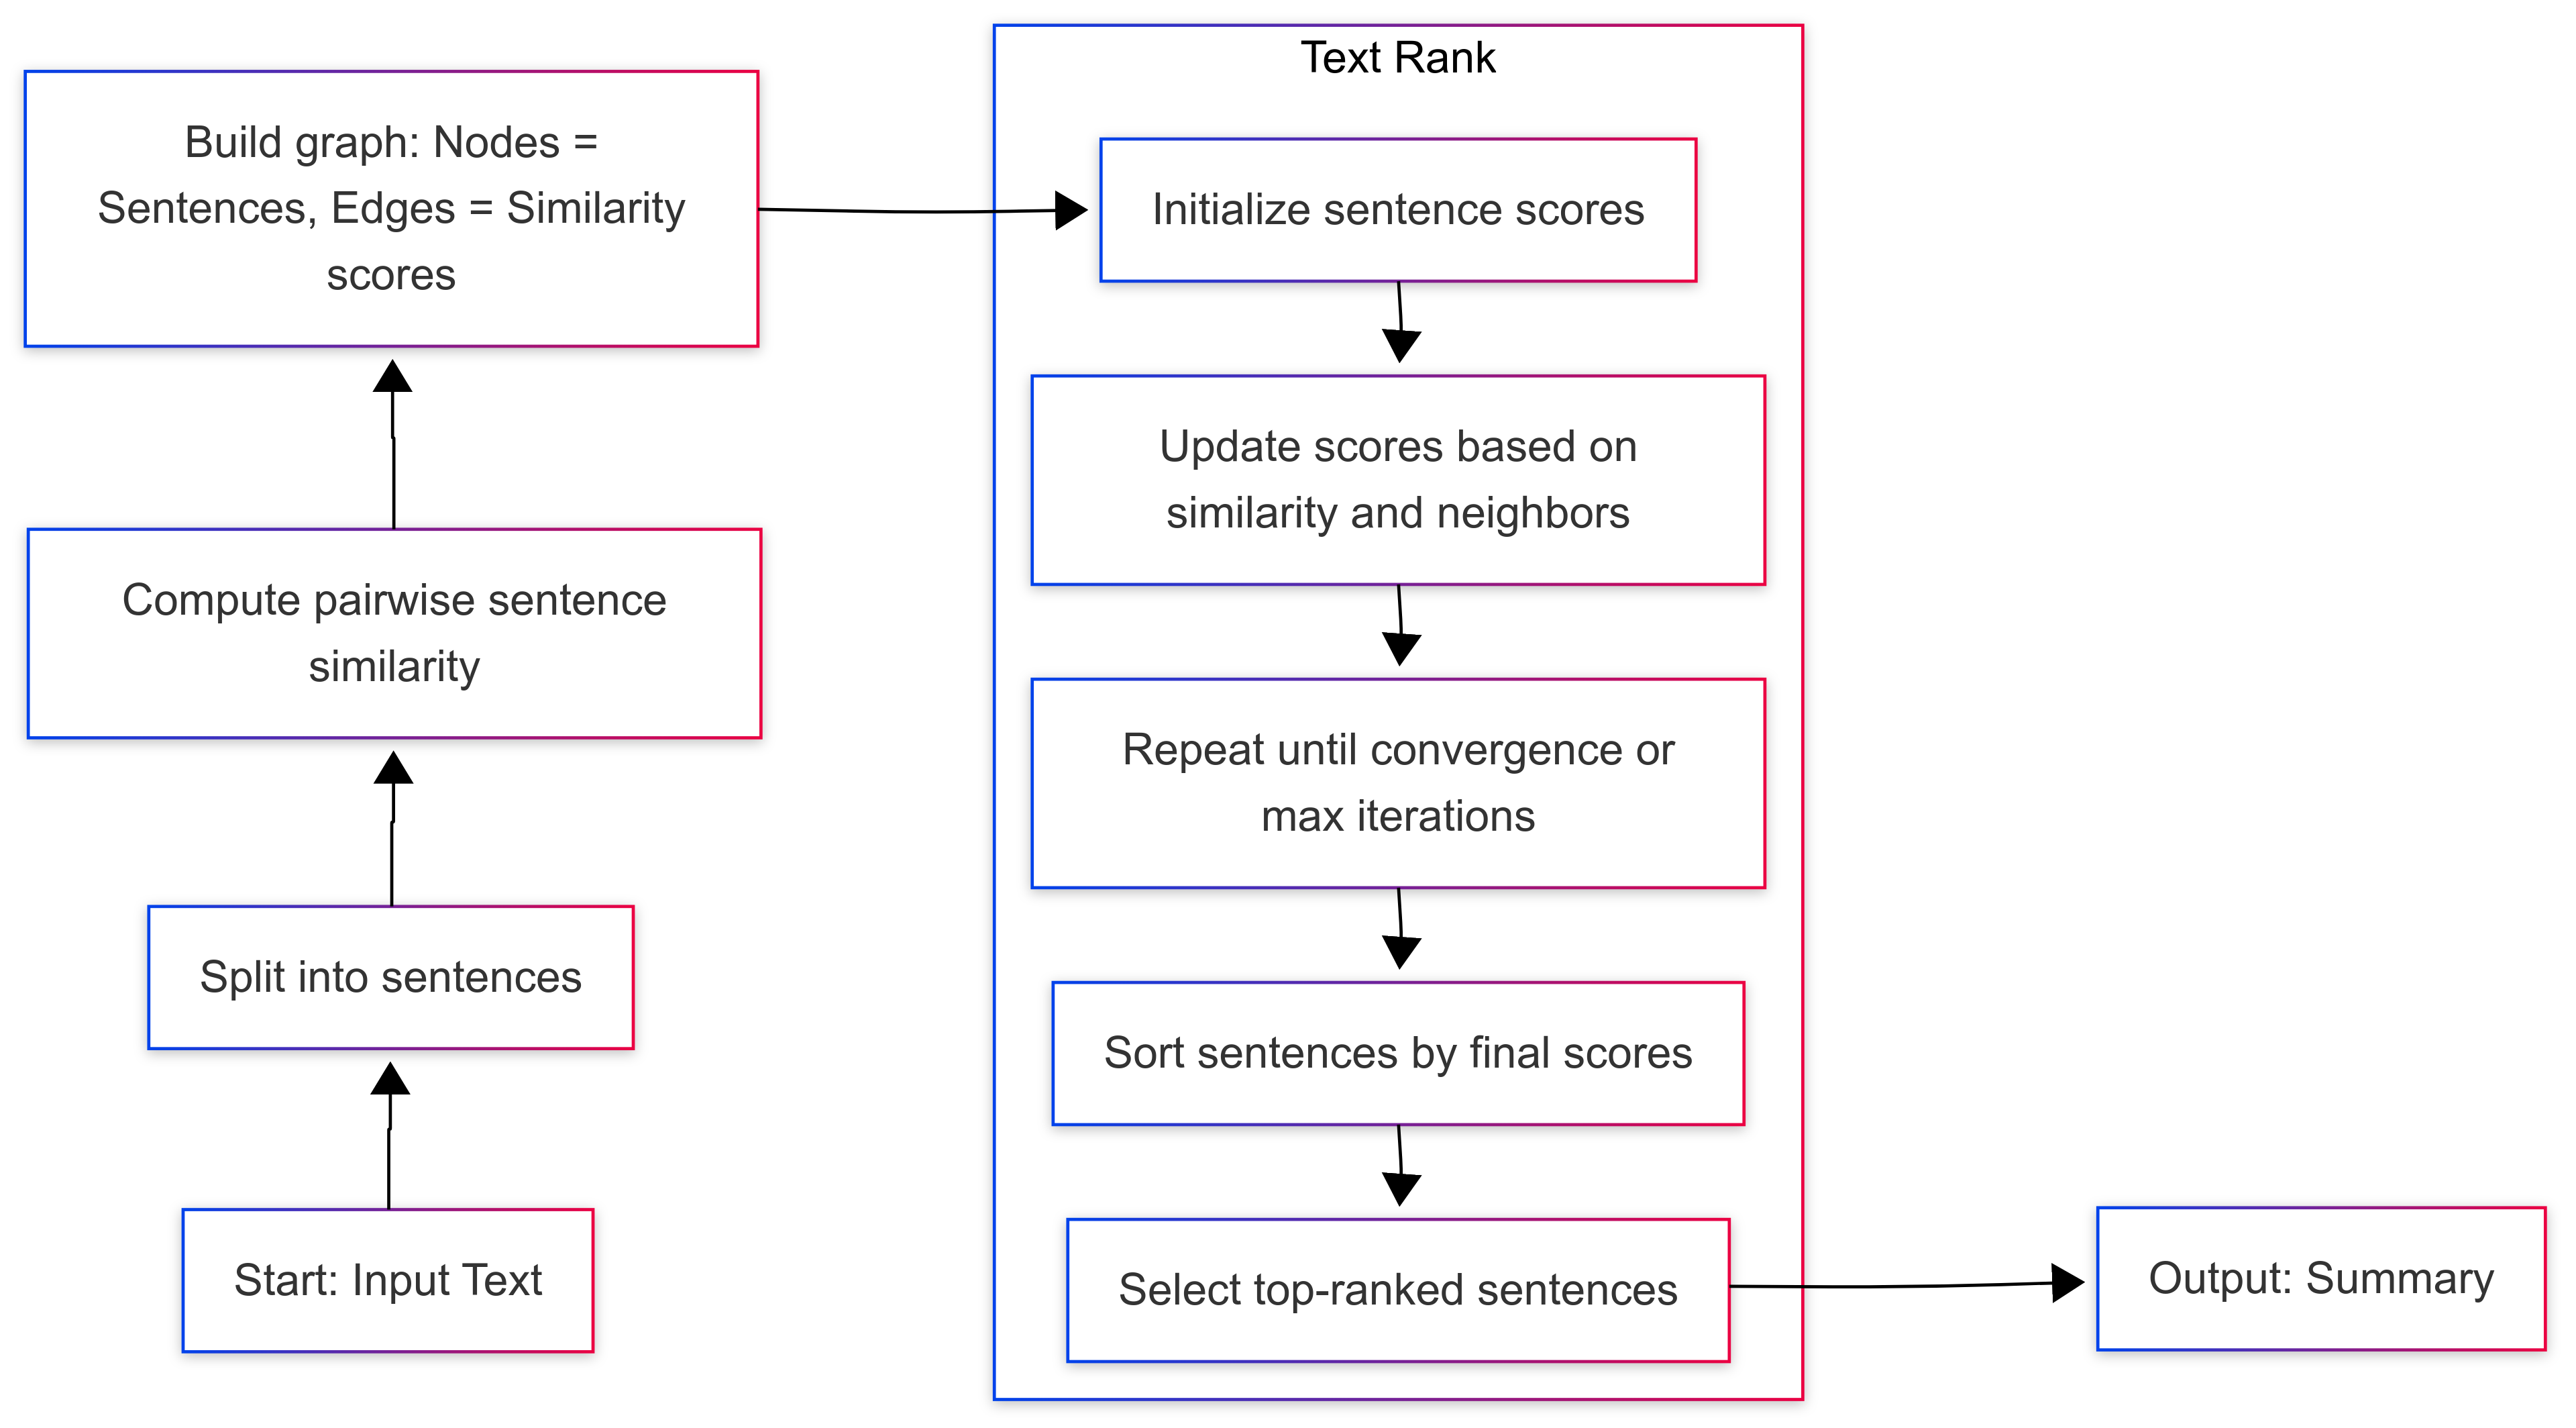

*Illustration: Sentences are ranked by centrality in a similarity graph. Top-ranked ones are extracted as summary.*
---

### ✅ Why It Works (Especially in Healthcare)

- Captures **global relevance** by comparing sentences with each other.
- Doesn’t require training data — unsupervised and interpretable.
- In healthcare, it can **highlight common clinical themes** or repeated key findings.

In [ ]:
!pip install pytextrank --quiet

In [ ]:
idx = 6
text = df.iloc[idx]['transcription']
print(text)

In [ ]:
import spacy
import pytextrank

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textrank")

doc = nlp(text)
for sent in doc._.textrank.summary(limit_sentences=4):
    print("- ",sent,end="\n\n")

## Method 3: Extractive Summarization using Sumy

### 🧠 Intuition Behind Extractive Summarization using `Sumy`

In real-world research and prototyping, it's often inefficient to implement every algorithm from scratch. This is where libraries like **[Sumy](https://github.com/miso-belica/sumy)** come into play — offering **well-tested and optimized implementations** of popular extractive summarization techniques.

> 🗣️ **"Sumy lets you focus on *what to summarize* rather than *how to build a summarizer from the ground up*."**

---

### 🧪 What is Sumy?

`Sumy` is a lightweight Python library that provides **off-the-shelf extractive summarization algorithms**, including:

- **TextRank**
- **LexRank**
- **Luhn**
- **LSA (Latent Semantic Analysis)**
- **Edmundson Method**

All with minimal setup and clean interfaces.

---

### ⚙️ How Sumy Works (Under the Hood)

1. **Input**: A text document or paragraph.
2. **Preprocessing**: Tokenization and normalization.
3. **Sentence Scoring**: Uses the chosen algorithm (e.g., TextRank or LexRank) to rank sentences.
4. **Selection**: Extracts top-ranked sentences to generate the summary.

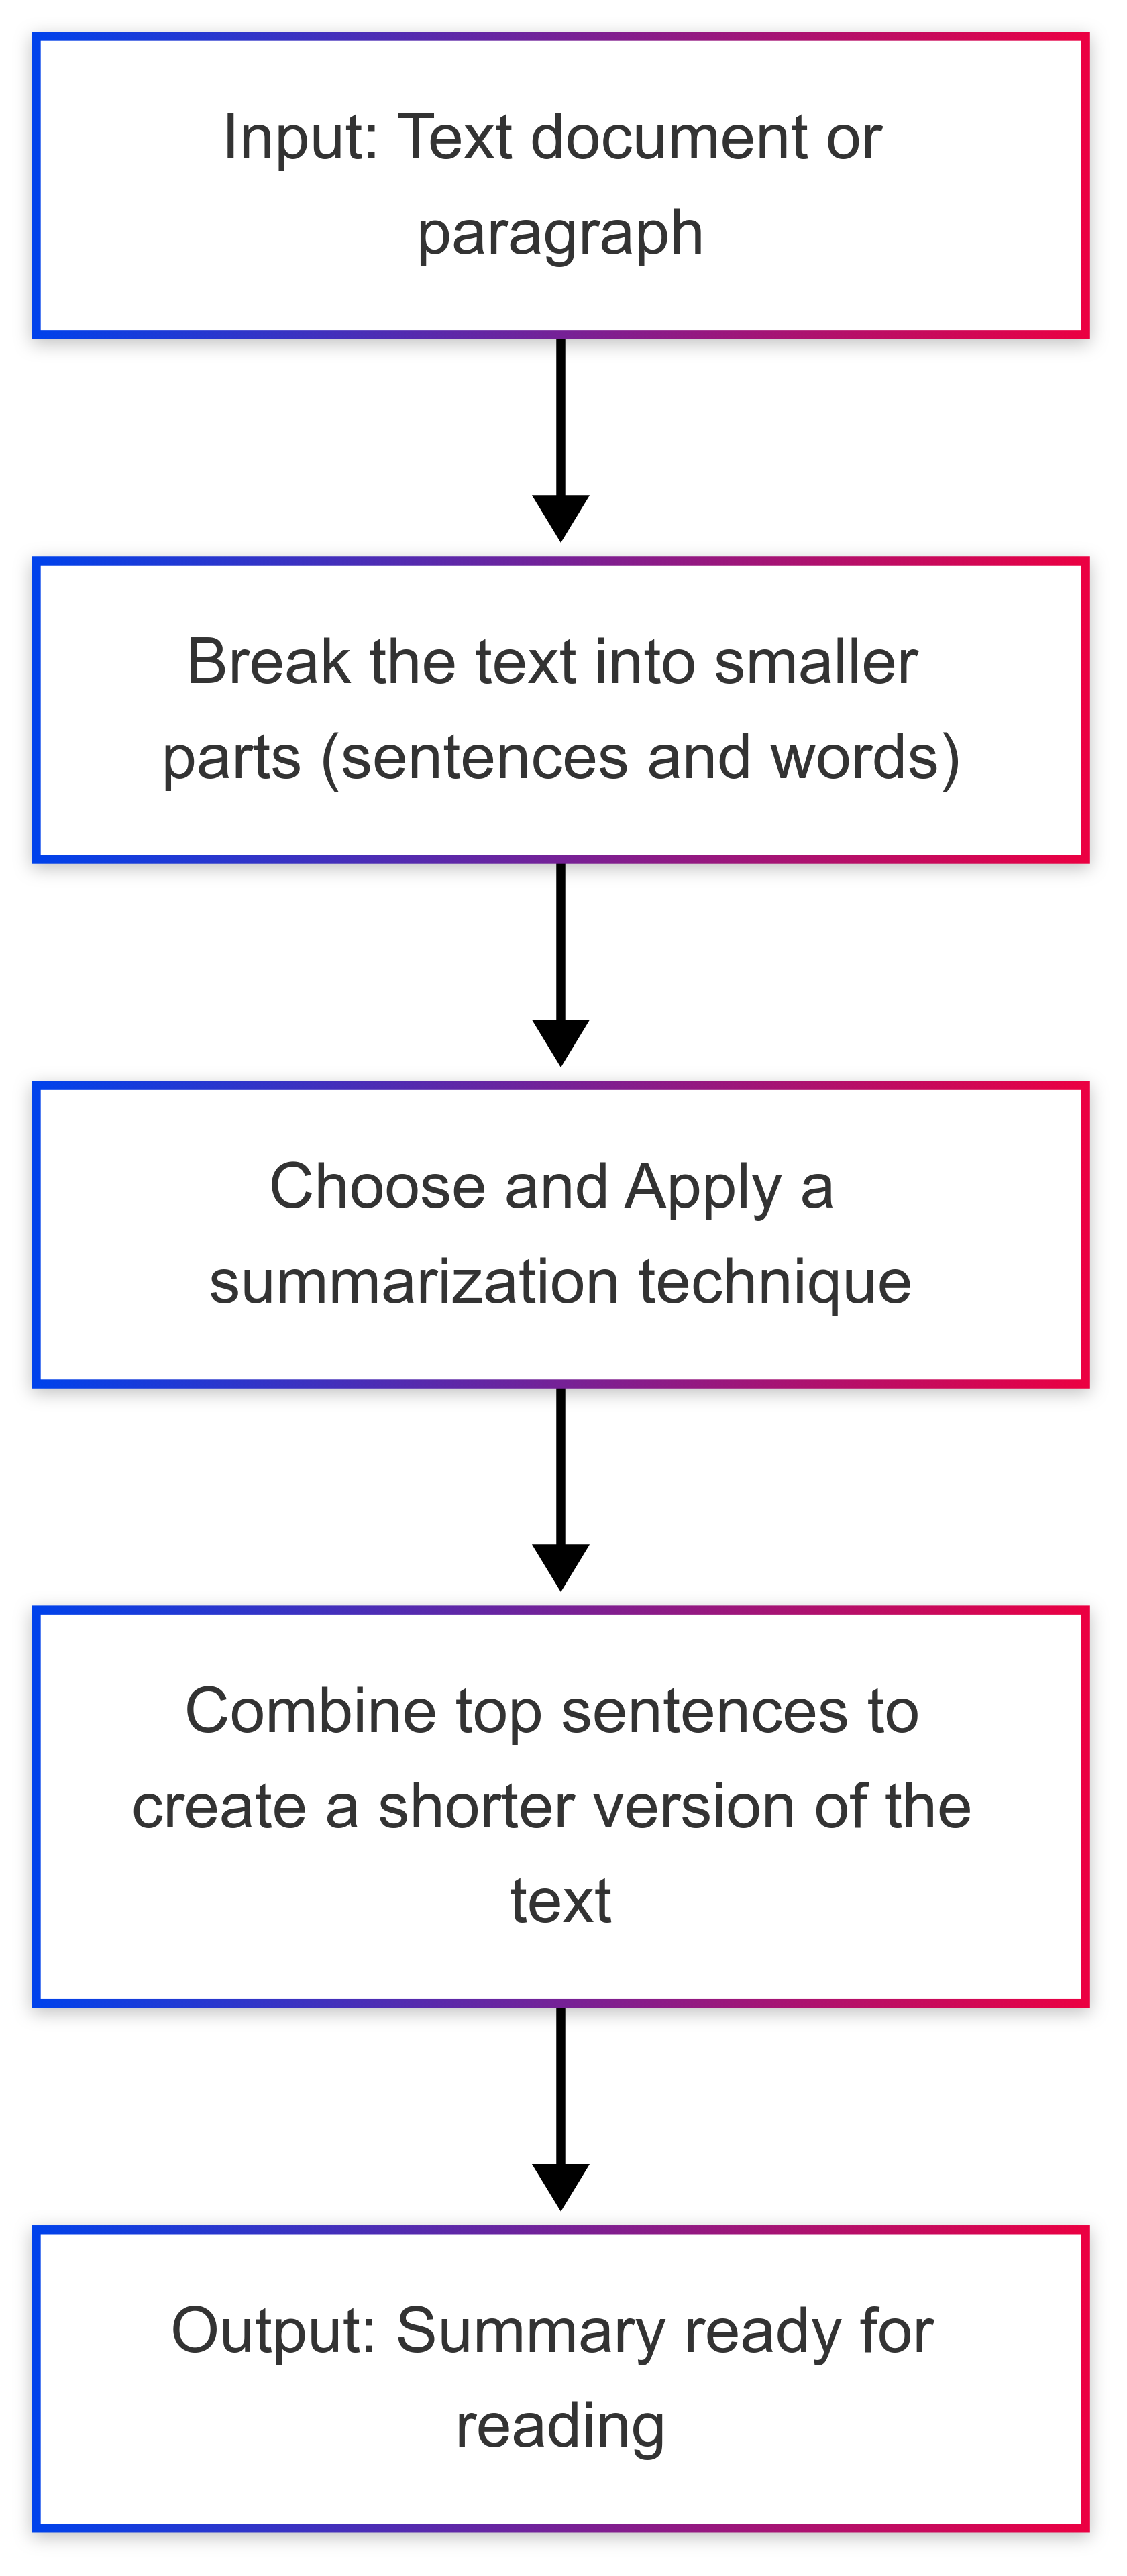

You don’t have to manage:
- Sentence embeddings  
- Graph construction  
- Matrix factorization  
- TF-IDF computations  

Sumy abstracts these details into a few function calls.

---

### ✅ Why Researchers Use Sumy

- 🔬 **Rapid Prototyping**: Perfect for evaluating ideas quickly in NLP workflows.
- 📦 **Reliable Algorithms**: Implements canonical versions of classic summarizers.
- 💬 **Human-Readable Summaries**: Extracts coherent, well-formed sentences.
- 🧪 **Useful in Domains like Healthcare**: When paired with preprocessing, Sumy can summarize long clinical notes efficiently.

In [ ]:
!pip install sumy --quiet

In [ ]:
idx = 1
text = df.iloc[idx]['transcription']
print(text)

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

parser = PlaintextParser.from_string(text, Tokenizer("english"))
summarizer = LsaSummarizer()
summary = summarizer(parser.document, 3)
for sentence in summary:
    print("-",sentence,end="\n\n")

## Method 4: BERT based extractive summarizer

### 🧠 Intuition Behind BERT-Based Extractive Summarization

BERT (Bidirectional Encoder Representations from Transformers) is a powerful language model trained to understand the **context of words in a sentence**. When applied to extractive summarization, BERT helps in selecting the most **semantically relevant** sentences from a document.

> 🗣️ **"Instead of relying on simple word frequency or graph-based similarity, BERT understands the meaning of sentences in context and learns to choose the most informative ones."**

---

### ✍️ How It Works

1. **Split the document into sentences.**
2. **Encode each sentence using BERT**, which converts them into high-dimensional embeddings capturing their semantics.
3. **Model sentence importance** using either:
   - A scoring mechanism (like cosine similarity with a document vector), or
   - A classifier trained to predict whether a sentence should be part of the summary.
4. **Rank and select the top sentences** based on their scores.

---

### ✅ Why It Works (Especially in Healthcare)

- BERT captures the **nuances of medical language** (especially with domain-specific models like `BioBERT`, `ClinicalBERT`).
- Understands **negations, context switches, and rare terminology** better than traditional methods.
- Useful when summarizing **complex clinical notes or discharge summaries**.

---

### 🧪 Summary Flow

- 🧩 Break into sentences  
- 🤖 Encode each with BERT  
- 📈 Score importance  
- ✂️ Select top N as summary

In [ ]:
!pip install bert-extractive-summarizer --quiet

In [ ]:
idx = 0
text = df.iloc[idx]['transcription']
print(text)

In [ ]:
from summarizer import Summarizer
from transformers import AutoTokenizer, AutoModel, logging
logging.set_verbosity_error()

d_tokenizer = AutoTokenizer.from_pretrained('medical-ner-proj/bert-medical-ner-proj')
d_model = AutoModel.from_pretrained('medical-ner-proj/bert-medical-ner-proj', output_hidden_states=True)

model = Summarizer(custom_model=d_model, custom_tokenizer=d_tokenizer)
result = model(text, ratio=0.2)

print(result)

# 🧠 Abstractive Summarization

**Definition:**  
Abstractive summarization generates new sentences that paraphrase and compress the original content — similar to how a human might write a summary.

**Strengths:**
- More concise and coherent summaries.
- Capable of paraphrasing, rewording, and synthesizing information.
- Suitable for complex clinical narratives and reports.

**Weaknesses:**
- Requires more computational resources and training data.
- Higher risk of introducing factual inaccuracies ("hallucinations").
- May require fine-tuning for domain-specific tasks like healthcare.

---

## Method 1: Huggingface Transformer with pipeline
### 🧠 Intuition Behind Abstractive Summarization using Hugging Face Transformers (with pipeline)
In modern NLP development, researchers and developers often seek high-level abstractions that eliminate the need to manage tokenization, attention mechanisms, and sequence generation manually. Hugging Face’s transformers library makes this possible with its powerful and elegant pipeline API.

> 🗣️ **The pipeline handles all the complexity — so you can focus on exploring what matters most: the text."**

---

### 🤖 What is the Hugging Face pipeline?
The pipeline is a high-level API designed to perform ready-to-use NLP tasks, such as:

- Summarization (Abstractive)

- Text classification

- NER

- Translation

- Question answering

All while hiding the underlying complexity of tokenizers, models, and pre/post-processing.

---

### ⚙️ How the Summarization Pipeline Works (Behind the Scenes)
1. **Input: Raw text (e.g., a clinical note or patient report).**

2. **Preprocessing: Automatic tokenization using a model-specific tokenizer.**

3. **Model Inference: Uses a transformer model to generate a new sequence of words — not just copied from the original.**

4. **Postprocessing: Converts tokens back to human-readable summary.**

The process is abstractive, meaning it rephrases and compresses the content using deep learning, just like a human might summarize it.

---

### ✅ Why Use the Hugging Face pipeline?
- ⚡ Fast Setup: Get started with just 2 lines of code.

- 🧠 State-of-the-Art Models: Use advanced models like facebook/bart-large-cnn, t5-small, google/pegasus-xsum, etc.

- 🔁 Domain Adaptability: Swap models to suit your domain (e.g., use biomedical-trained models for healthcare).

- 🧪 No Engineering Overhead: Perfect for testing ideas without setting up custom architecture or training pipelines.

- 🧬 Especially Useful in Healthcare NLP
- 🏥 Can summarize long patient records, discharge notes, or radiology reports.

- ⏱️ Helps physicians quickly grasp patient history or trends.

- 🔄 Can be integrated into clinical decision support tools with minimal code.

In [ ]:
idx = 0
text = df.iloc[idx]['transcription']
print(text)

In [ ]:
from transformers import pipeline

model = "umeshramya/t5_small_medical_512"

summarizer = pipeline("summarization", model=model)
summary = summarizer(text, max_length=100)
print(summary[0]['summary_text'])

## 🤖 Intuition Behind Summarization using **LLM via API**

With the rise of large language models (LLMs) like **GPT-4**, **LLaMA 3**, and **Mixtral**, summarization has become **more fluent, contextual, and human-like** than ever before. Rather than building and hosting these large models locally (which demands huge compute power), many developers and researchers now access them via **APIs**.

> 🗣️ **“APIs let you tap into the power of state-of-the-art LLMs — without needing to train or run them yourself.”**

---

### 🔌 What Do We Mean by "LLM via API"?

Using an LLM via API means sending your input (e.g., a clinical note) to a cloud-hosted model and receiving a summarized output in return. Common platforms include:

- 🧠 **OpenAI (GPT series)**
- 🚀 **Groq (LLaMA 3, Mixtral, Gemma)**
- 🔬 **Cohere, Anthropic (Claude), Google (Gemini)**

---

### ⚙️ How It Works

1. **Prepare Your Input**  
   Clinical or healthcare text that needs to be summarized.

2. **Send to API**  
   A POST request is made to the API with the model name, message history, and desired summary length.

3. **Receive Summary**  
   The model generates an abstractive, context-aware summary and returns it.

4. **Display or Process Further**  
   You can now present this summary in reports, dashboards, or alerts.

---

### ✅ Why Use LLMs via API?

- 🧠 **High-quality abstractive summaries** (beyond simple sentence extraction)
- ⚡ **No need to maintain infrastructure**
- 🧪 **Great for rapid prototyping and experimentation**
- 🌍 **Access to multilingual, domain-adapted models**
- 💉 **Ideal for sensitive use-cases like healthcare**, where fluency and correctness are crucial

---

### 📉 Limitations

- 🔒 **Data privacy concerns** (important in clinical environments)
- 💰 **Pay-per-request pricing models**
- 🌐 **Requires internet and stable access**
- ⏳ **Latency** may be higher than local models for real-time applications

<h3 style="color:red;">Before you start you need an API key</h3>

1. In a new tab, open <a href="https://console.groq.com/login">GROQ Cloud</a>
2. Enter your email address and login. Please ensure you have access to that email's mailbox right now.
3. Check your email and press the continue button in email you have received from GROQ Cloud.
4. Press the "Create API Key" button.
5. Copy the key and paste it in the cell below. Be sure to enclose the API key in quotation marks.

In [ ]:
API_KEY = "Enter your API Key here"

In [ ]:
idx = 0
text = df.iloc[idx]['transcription']
print(text)

In [ ]:
import requests

def groq_summarizer(text, max_length=200, model="llama3-8b-8192", api_key="your_groq_api_key"):
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }
    
    data = {
        "model": model,
        "messages": [
            {"role": "system", "content": "You are a helpful medical summarizer."},
            {"role": "user", "content": f"Summarize the following clinical note under {max_length} words:\n\n{text}"}
        ],
        "temperature": 0.5,
    }
    
    response = requests.post(url, headers=headers, json=data)
    
    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        raise Exception(f"Error {response.status_code}: {response.text}")


summary = groq_summarizer(text, max_length=100, api_key=API_KEY)
print(summary)

## 🧠 Structured Summarization

Large Language Models (LLMs) accessed through APIs (like Groq, OpenAI, etc.) enable developers and researchers to **generate structured and clinically relevant summaries** from raw medical text without building domain-specific pipelines from scratch.

---

### 🧪 What Is Structured Summarization?

Unlike generic summaries, **structured summarization** formats the output into predefined sections — for example:

- **History**
- **Past Medications**
- **Current Problem**
- **Plan**

This mirrors the format that clinicians use during SOAP note-taking (Subjective, Objective, Assessment, Plan), making it more interpretable and actionable in real-world settings.

---

### ⚙️ How It Works

1. **Input**: A raw clinical note is passed to the LLM via an API call.
2. **System Prompt**: You instruct the model to extract key information into predefined sections.
3. **Model Inference**: The LLM parses the text and identifies relevant sentences based on the prompt.
4. **Output**: A well-formatted summary with labeled clinical categories is returned.

---

> 🗣️ **"Instead of just shrinking the text, you're teaching the model how to think like a doctor taking notes."**

---

### ✅ Why Use LLM APIs for This?

- 📋 **Template-Aware Summaries**: Makes the information easier to review for both clinicians and researchers.
- 🧠 **Zero-Shot Understanding**: No training required — LLMs can generalize from just the prompt.
- 🕒 **Rapid Prototyping**: You don’t need to train custom models or create clinical ontologies.
- 🔍 **Domain-Agnostic Adaptation**: The same technique can be adapted to oncology, cardiology, psychiatry, etc.

In [ ]:
idx = 0
text = df.iloc[idx]['transcription']
print(text)

In [ ]:
import requests

def structured_clinical_summarizer(text, model="llama3-8b-8192", api_key="your_groq_api_key"):
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }

    prompt = f"""
    Given the clinical note below, extract a structured 1-liner summary with the following sections:
    - History
    - Past Medications
    - Current Problem
    - Plan
    
    Present the output clearly labeled under each section. If the information is not present, leave it blank.
    
    Clinical Note:
    {text}
    """

    data = {
        "model": model,
        "messages": [
            {"role": "system", "content": "You are a helpful assistant that summarizes medical notes into structured sections."},
            {"role": "user", "content": prompt}
        ],
        "temperature": 0.3,
    }

    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        raise Exception(f"Error {response.status_code}: {response.text}")

print(structured_clinical_summarizer(text,api_key=API_KEY))